In [71]:
# ML analysis 

### STEPS TO BE ACCOMPLISHED
#### 1. IMPORTS
#### 2. Data :: Download, Load, Explore, Preprocessing
#### 3. Exploratory Data Visualization
#### 4. Model Building And Training :: Build Logistic Regression Model, Training the Model
#### 5. Evaluation :: Evaluating Training Set, Evaluating Testing Set
#### 6. Generating Classification Report
#### 7. Visualizing using Confusion Matrix
#### 8. Conclusion

In [87]:
# 1. IMPORTS Done
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc
import matplotlib.colors as mcolors

In [88]:
# 2. Data :: Loading, reading, exploring

heartML = pd.read_csv("heartML.csv")
print(heartML.shape)
heartML.info()
heartML.head(5)

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
# Drop columns that are not necessary for analysis
# Drop Age and Sex [Remainder: Reasons for Heart attack]

def removeC(tempDf, NotUsed):
    
    useCols = []
    data = {}
    for col in tempDf.columns:
        if col not in NotUsed:
            data[col] = tempDf[col]

    newDf = pd.DataFrame(data) 
    return newDf

heartMLNotUsed = ['age', 'sex']
heartML = removeC(heartML, heartMLNotUsed)

In [90]:
heartML = heartML.rename(columns = {'cp':'chest_pain','trtbps': 'resting_bp(mmhg)','chol': 'cholestoral(mg/dl)','fbs': 'fasting_blood_sugar(1/0)',
                                    'thalachh': 'max_heart_rate','exng': 'exercise_anigna(1/0)','caa': 'num_major_vessels(0-3)'
                                    })

In [91]:
heartML.drop_duplicates(inplace=True)
heart.drop_duplicates(inplace=True)
print(sum(heartML.duplicated()))
print(sum(heart.duplicated()))

0
0


In [92]:
heartML.isnull().sum()

chest_pain                  0
resting_bp(mmhg)            0
cholestoral(mg/dl)          0
fasting_blood_sugar(1/0)    0
restecg                     0
max_heart_rate              0
exercise_anigna(1/0)        0
oldpeak                     0
slp                         0
num_major_vessels(0-3)      0
thall                       0
output                      0
dtype: int64

1    164
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

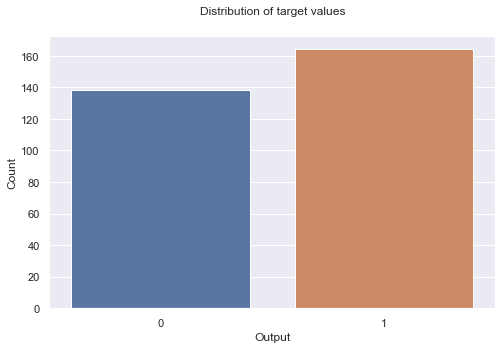

In [93]:
print(heartML['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heartML['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

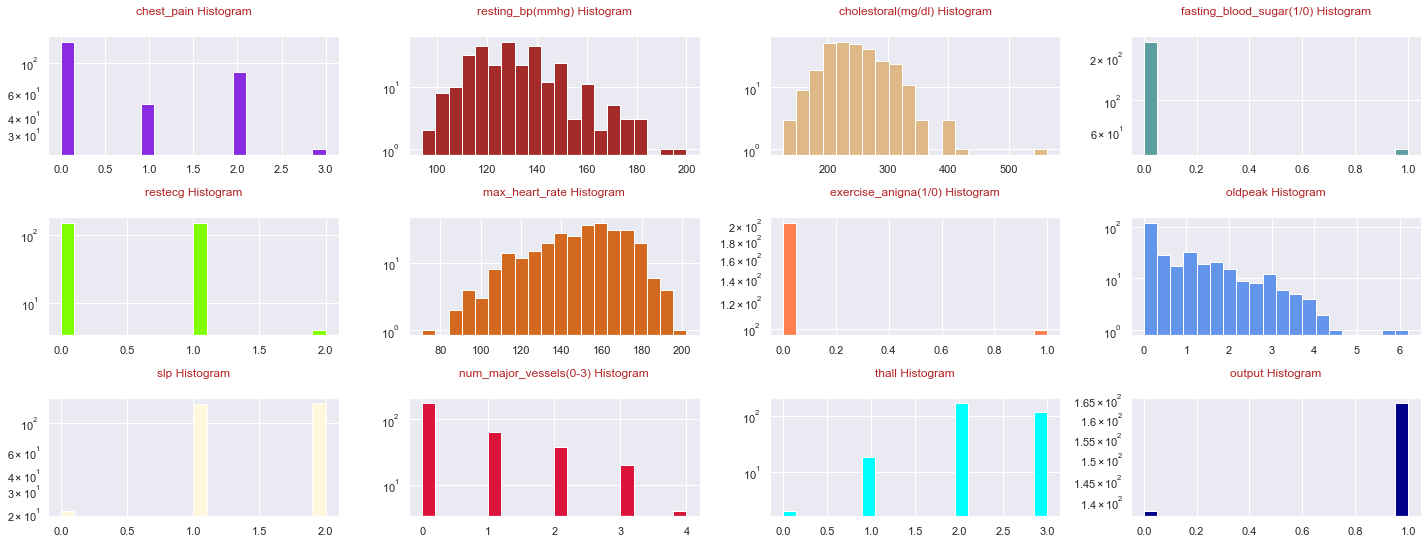

In [95]:
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(heartML,heartML.columns,8,4)